In [1]:
%matplotlib inline

# Using the formulary with `astropy.units` input

In [2]:
from astropy import units as u
from plasmapy import formulary
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Sample ITER data

In [3]:
electron_temperature = 8.8 * u.keV
electron_concentration = 10.1e19 / u.m**3
formulary.Debye_length(electron_temperature, electron_concentration)

<Quantity 6.93904681e-05 m>

Note that we can also neglect the unit for the concentration, as
1/m^3 is the a standard unit for this kind of Quantity:



In [4]:
formulary.Debye_length(electron_temperature, 10.1e19)

<Quantity 6.93904681e-05 m>

PlasmaPy will continue to shout at us for doing that, thought. We can silence these warnings using:

In [11]:
from plasmapy.utils.exceptions import ImplicitUnitConversionWarning
import warnings
warnings.simplefilter("ignore", ImplicitUnitConversionWarning)
formulary.Debye_length(electron_temperature, electron_concentration)

<Quantity 6.93904681e-05 m>

We can try calculating the gyroradius:

In [6]:
B = 5.3 * u.T
ion_temperature = 8 * u.keV

formulary.gyroradius(B, T_i=ion_temperature, particle='e')

/home/dominik/Code/github/PlasmaPy/PlasmaPy/plasmapy/utils/decorators/checks.py:1389: RelativityWarning: thermal_speed is yielding a velocity that is 17.695% of the speed of light. Relativistic effects may be important.
  warnings.warn(


<Quantity 5.69080131e-05 m>

In [7]:
print(formulary.inertial_length(electron_concentration, particle='e'))

0.0005287720427518426 m


In these conditions, they should reach thermal velocities of about



In [8]:
print(formulary.thermal_speed(T=electron_temperature, particle='e'))

55637426.422858626 m / s


/home/dominik/Code/github/PlasmaPy/PlasmaPy/plasmapy/utils/decorators/checks.py:1389: RelativityWarning: thermal_speed is yielding a velocity that is 18.559% of the speed of light. Relativistic effects may be important.
  warnings.warn(


In [9]:
print(formulary.plasma_frequency(electron_concentration))

566959736448.652 rad / s


# Usage with plots

Let's try to recreate some plots and get a feel for some of these quantities.
We will also compare our data to real-world plasma situations.



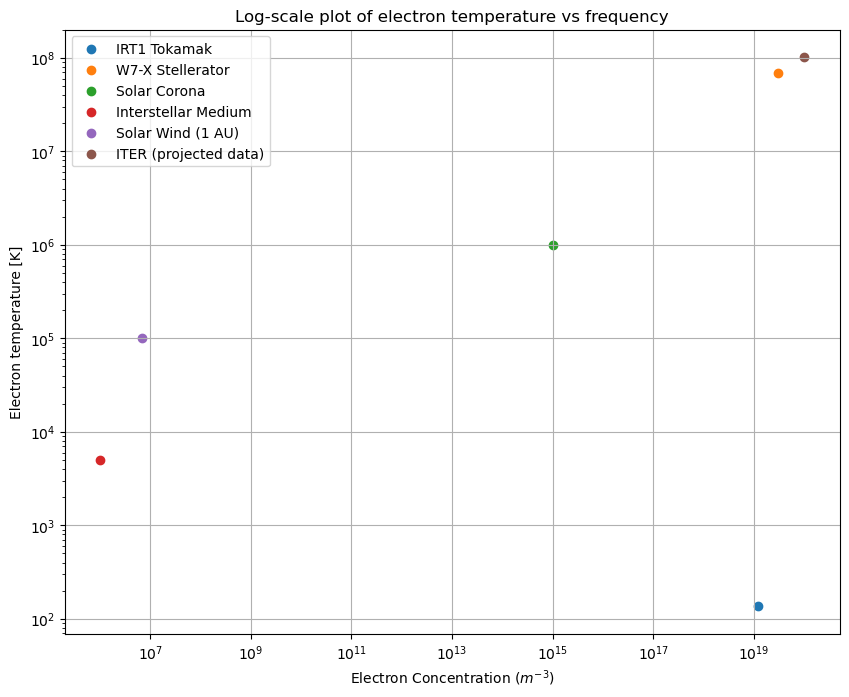

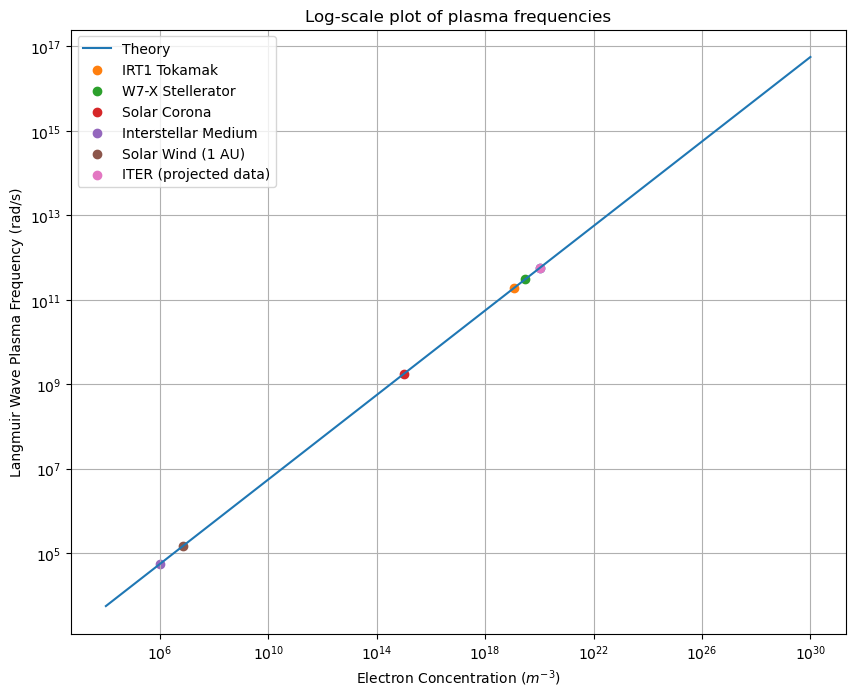

In [12]:
_, T_axis = plt.subplots()
_, omega_axis = plt.subplots()

n_e = np.logspace(4, 30, 100) / u.m**3
omega_axis.plot(n_e, formulary.plasma_frequency(n_e), label="Theory")
omega_axis.scatter(
    electron_concentration,
    formulary.plasma_frequency(electron_concentration),
    )

# IRT1 Tokamak Data
# http://article.sapub.org/pdf/10.5923.j.jnpp.20110101.03.pdf
n_e = 1.2e19 / u.m**3
T_e = 136.8323 * u.eV
B = 0.82 * u.T
label = "IRT1 Tokamak"
T_axis.scatter(n_e, T_e, label=label)
omega_axis.scatter(n_e, formulary.plasma_frequency(n_e), label=label)

# Wendelstein 7-X Stellerator Data
# https://nucleus.iaea.org/sites/fusionportal/Shared%20Documents/FEC%202016/fec2016-preprints/preprint0541.pdf
n_e = 3e19 / u.m**3
T_e = 6 * u.keV
B = 3 * u.T
label = "W7-X Stellerator"
T_axis.scatter(n_e, T_e.to(u.K, equivalencies=u.temperature_energy()), label=label)
omega_axis.scatter(n_e, formulary.plasma_frequency(n_e), label=label)

# Solar Corona
# Estimated by Nick Murphy
n_e = 1e15 / u.m**3
T_e = 1e6 * u.K
B = 0.005 * u.T
label = "Solar Corona"
T_axis.scatter(n_e, T_e, label=label)
omega_axis.scatter(n_e, formulary.plasma_frequency(n_e), label=label)

# Interstellar (warm neutral) Medium
# Estimated by Nick Murphy
n_e = 1e6 / u.m**3
T_e = 5e3 * u.K
B = 0.005 * u.T
label = "Interstellar Medium"
T_axis.scatter(n_e, T_e, label=label)
omega_axis.scatter(n_e, formulary.plasma_frequency(n_e), label=label)

# Solar Wind at 1 AU
# Estimated by Nick Murphy
n_e = 7e6 / u.m**3
T_e = 1e5 * u.K
B = 5e-9 * u.T
label = "Solar Wind (1 AU)"
T_axis.scatter(n_e, T_e, label=label)
omega_axis.scatter(n_e, formulary.plasma_frequency(n_e), label=label)

# Projected ITER parameters
# http://fusionwiki.ciemat.es/wiki/ITER
n_e = 10.1e19 / u.m**3
T_e = 8.8 * u.keV.to(u.K, equivalencies=u.temperature_energy())
B = 5.3 * u.T
label = "ITER (projected data)"
T_axis.scatter(n_e, T_e, label=label)
omega_axis.scatter(n_e, formulary.plasma_frequency(n_e), label=label)



omega_axis.set(xlabel="Electron Concentration ($m^{-3}$)", ylabel="Langmuir Wave Plasma Frequency (rad/s)", xscale="log", yscale="log", title="Log-scale plot of plasma frequencies")
omega_axis.legend()
omega_axis.grid()
T_axis.set(xlabel="Electron Concentration ($m^{-3}$)", ylabel="Electron temperature [K]", xscale="log", yscale="log", title="Log-scale plot of electron temperature vs frequency")
T_axis.legend()
T_axis.grid()
plt.show()